In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [5]:
# Target variable
y = iris_data['petal length (cm)']

# Feature variables for Linear and Multilinear Regression
X_linear = iris_data[['sepal length (cm)']]  # Linear regression using only one feature
X_multilinear = iris_data.drop(columns=['petal length (cm)'])  # Multilinear regression using all features

# Split data into training and testing sets
X_train_linear, X_test_linear, y_train, y_test = train_test_split(X_linear, y, test_size=0.2, random_state=42)
X_train_multilinear, X_test_multilinear = train_test_split(X_multilinear, test_size=0.2, random_state=42)


In [6]:
# ----- Linear Regression -----
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train)
y_pred_linear = linear_model.predict(X_test_linear)


In [7]:
# ----- Multilinear Regression -----
multilinear_model = LinearRegression()
multilinear_model.fit(X_train_multilinear, y_train)
y_pred_multilinear = multilinear_model.predict(X_test_multilinear)


In [8]:
# ----- Polynomial Regression -----
# We will create a polynomial feature for 'sepal length (cm)'
poly = PolynomialFeatures(degree=3)  # You can adjust the degree of the polynomial
X_poly = poly.fit_transform(X_linear)

# Split the data for Polynomial regression
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)


In [9]:
# ----- Evaluation -----
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

# Evaluate each model
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_multilinear, "Multilinear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")



Linear Regression Evaluation:
Mean Squared Error: 0.5960765879745186
R-squared: 0.8181245472591437

Multilinear Regression Evaluation:
Mean Squared Error: 0.13001626031382701
R-squared: 0.9603293155857663

Polynomial Regression Evaluation:
Mean Squared Error: 0.5117791324445381
R-squared: 0.8438454666824592


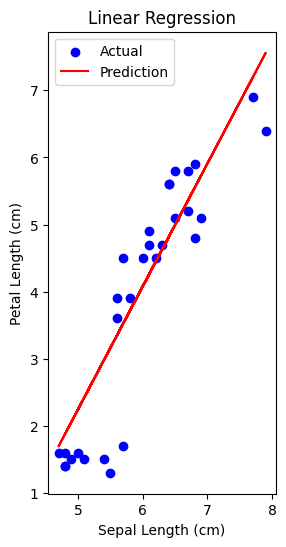

In [10]:
# Visualize results for Linear Regression (use only one feature for simplicity)
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.scatter(X_test_linear, y_test, color='blue', label='Actual')
plt.plot(X_test_linear, y_pred_linear, color='red', label='Prediction')
plt.title('Linear Regression')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()


Text(0, 0.5, 'Predicted Petal Length (cm)')

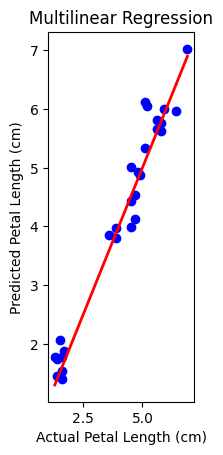

In [11]:
# Visualize results for Multilinear Regression
plt.subplot(132)
plt.scatter(y_test, y_pred_multilinear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Multilinear Regression')
plt.xlabel('Actual Petal Length (cm)')
plt.ylabel('Predicted Petal Length (cm)')


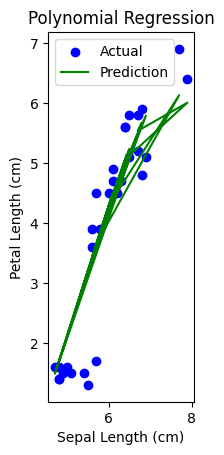

In [12]:
# Visualize results for Polynomial Regression
plt.subplot(133)
plt.scatter(X_test_linear, y_test, color='blue', label='Actual')
plt.plot(X_test_linear, y_pred_poly, color='green', label='Prediction')
plt.title('Polynomial Regression')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()


In [13]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>